In [15]:
import numpy as np
import pandas as pd

df = pd.read_csv("data.csv", header=None)
df

,0,1,2
0,10182.554999,-371.830691,100.0
1,-8493.323486,7009.446179,0.0
2,21322.088204,-390.558362,100.0
3,5473.925002,-1878.223941,0.0
4,-7422.540710,5291.351276,0.0
...,...,...,...
14995,-7273.210307,5827.740028,0.0
14996,16408.532323,1111.727000,100.0
14997,-7732.465058,14232.038118,0.0
14998,6249.812673,6541.827106,0.0


In [93]:
#import matplotlib.pyplot as plt 

#plt.scatter(df[0], df[1])

In [73]:
# remove outliers 
Q1 = df[0].quantile(q=0.25)
Q3 = df[0].quantile(q=0.75)
IQR = Q3-Q1
# remove outliers
ul = Q3 + 1.5 * IQR
ll = Q1 - 1.5*IQR
outliers = [(df[0] > ul) | (df[0] < ll)]
df.drop(df[(df[0] > ul) | (df[0] < ll) ].index , inplace=True)

In [74]:
df.shape

(14996, 3)

In [75]:
df.corr()

,0,1,2
0,1.000000,-0.318379,0.521763
1,-0.318379,1.000000,-0.612707
2,0.521763,-0.612707,1.000000


In [19]:
from sklearn.model_selection import train_test_split
X=df.drop(2,axis=1)
Y=df[2]
seed = 1
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=seed)

In [20]:
X_train.shape

(11247, 2)

In [21]:
X_test.shape

(3749, 2)

In [22]:
############decision tree

In [23]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

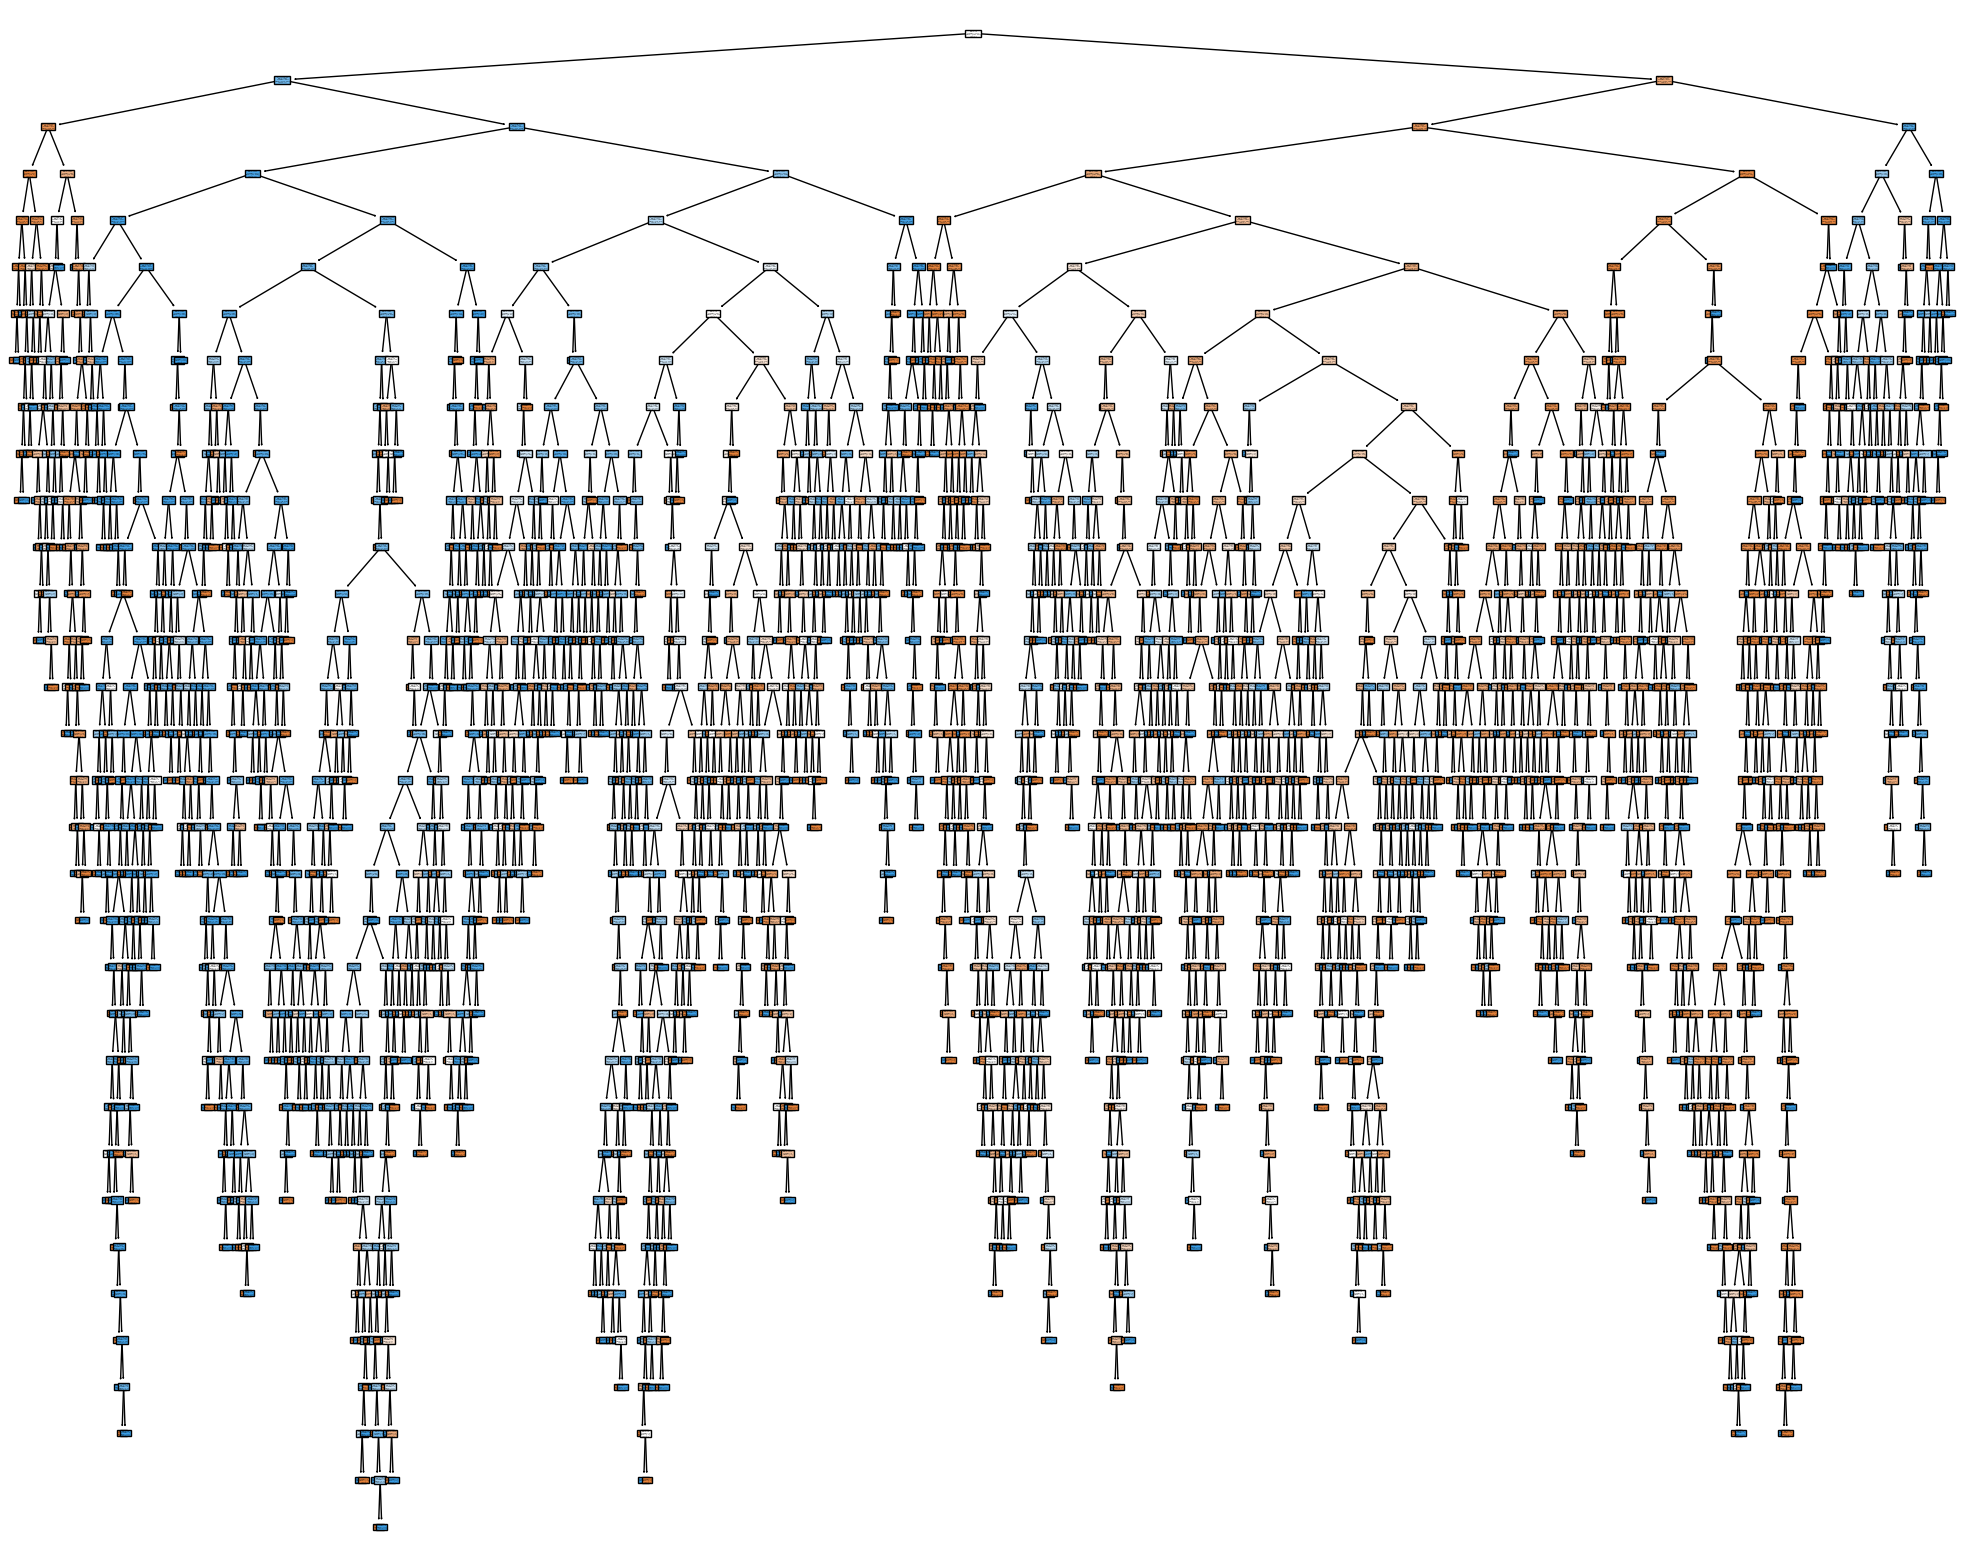

In [25]:
from sklearn import tree
import matplotlib.pyplot as plt 
fig = plt.figure(figsize=(25,20))
tree_plot = tree.plot_tree(dt_model,
                   feature_names=X_train.columns,
                   class_names=['0', "100"],
                   filled=True)

In [26]:
dt_model.score(X_train,y_train)

1.0

In [27]:
dt_model.score(X_test,y_test)

0.803680981595092

In [28]:
prediction = dt_model.predict(X_test)
y_pred = prediction

In [29]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.803680981595092

In [47]:
# use hyperparameter tuning to find the best parameters for our model 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
#X=df.drop(2,axis=1)
#Y=df[2]
model_dt = DecisionTreeClassifier()

In [48]:
param_grid = {"max_depth":[2,4,6,8,10,12],"max_features":[1,2,3],'criterion':["gini",'entropy']}

In [49]:
g_search = GridSearchCV(estimator = model_dt, param_grid = param_grid, cv = 10, return_train_score=True)
g_search.fit(X_train, y_train);
print(g_search.best_params_)

{'criterion': 'gini', 'max_depth': 2, 'max_features': 2}


In [50]:
g_search.best_estimator_

DecisionTreeClassifier(max_depth=2, max_features=2)

In [51]:
classifier = DecisionTreeClassifier(max_depth = 2,max_features=2, criterion = "gini",random_state=1,splitter='best')
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, max_features=2, random_state=1)

In [52]:
y_pred

array([100.,   0., 100., ..., 100.,   0.,   0.])

In [53]:
y_pred = g_search.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.8588957055214724

In [ ]:
#############################

In [37]:
X

,0,1
0,10182.554999,-371.830691
1,-8493.323486,7009.446179
2,21322.088204,-390.558362
3,5473.925002,-1878.223941
4,-7422.540710,5291.351276
...,...,...
14995,-7273.210307,5827.740028
14996,16408.532323,1111.727000
14997,-7732.465058,14232.038118
14998,6249.812673,6541.827106


In [ ]:
#logistic regression

In [54]:
from sklearn import linear_model
classifier = linear_model.LogisticRegression()
X=df.drop(2,axis=1)
Y=df[2]
classifier.fit(X_train, y_train)

LogisticRegression()

In [55]:
y_pred = classifier.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.8356895172045878

In [56]:
#################################################

In [57]:
#random forest

In [58]:
from sklearn.ensemble import RandomForestClassifier
rnd = RandomForestClassifier(n_jobs=-1)
rnd.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [62]:
pred_rnd = rnd.predict(X_test)

In [63]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_rnd))

              precision    recall  f1-score   support

         0.0       0.84      0.85      0.85      1875
       100.0       0.85      0.84      0.84      1874

    accuracy                           0.85      3749
   macro avg       0.85      0.85      0.85      3749
weighted avg       0.85      0.85      0.85      3749



In [64]:
metrics.accuracy_score(y_test, y_pred)

0.8356895172045878

In [ ]:
#####################

In [68]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(X_train, y_train)

SGDClassifier()

In [69]:
pred_sgd = sgd.predict(X_test)

In [70]:
metrics.accuracy_score(y_test, pred_sgd)

0.7167244598559616

In [76]:
######################
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
rnd_clf = RandomForestClassifier()
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)

In [77]:
y_pred_rf

array([100.,   0., 100., ..., 100.,   0.,   0.])

In [79]:
metrics.accuracy_score(y_test, y_pred_rf)

0.8458255534809282

In [81]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification
clf = ExtraTreesClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
ExtraTreesClassifier(random_state=0)
y_pred_rf= clf.predict(X_test)

In [82]:
metrics.accuracy_score(y_test, y_pred_rf)

0.8447586022939451

In [84]:
# Feature Scaling (to make sure that data for different features are in the same range)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [85]:
# Instantiate the Support Vector Classifier (SVC)
svc = SVC(C=1.0, random_state=1, kernel='linear')
 
# Fit the model
svc.fit(X_train_std, y_train)

SVC(kernel='linear', random_state=1)

In [86]:
# Make the predictions
y_predict = svc.predict(X_test_std)
 
# Measure the performance
print("Accuracy score %.3f" %metrics.accuracy_score(y_test, y_predict))

Accuracy score 0.835


In [ ]:
#svmm bc dataset

In [87]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn import metrics

In [88]:
# Load the data set
bc = datasets.load_breast_cancer()
X = bc.data
y = bc.target
 
# Create training and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [89]:
# Feature Scaling (to make sure that data for different features are in the same range)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [90]:
# Instantiate the Support Vector Classifier (SVC)
svc = SVC(C=1.0, random_state=1, kernel='linear')
 
# Fit the model
svc.fit(X_train_std, y_train)

SVC(kernel='linear', random_state=1)

In [91]:
# Make the predictions
y_predict = svc.predict(X_test_std)
 
# Measure the performance
print("Accuracy score %.3f" %metrics.accuracy_score(y_test, y_predict))

Accuracy score 0.953
